In [1]:
import numpy as np

def function1(x):  # 导数得定义
    return 0.01*x**2+0.1*x

def gedit(f,x):
    h = 1e-8
    return (f(x+h)-f(x-h))/(2*h)

def tangent_line(f,x):  # 求切线： y=kx+b
    d = gedit(f,x)  # 求得梯度  
    print(d)
    y = f(x)-d*x    # b = f(5)-f'(5)5
    return lambda t:d*t+y  # 返回的是一个函数lambda t:d*t+y，即f'(x)t+f(x)-f'(x)x:()
    
x = np.arange(0,20.0,0.1)
y = function1(x)
tf = tangent_line(function1, 5)
y2 = tf(x)

0.1999999943436137


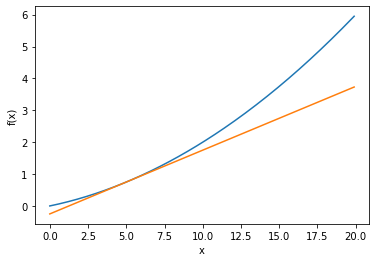

In [2]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot(x,y2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

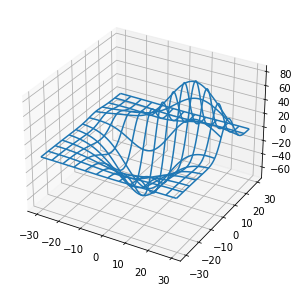

In [3]:
from mpl_toolkits.mplot3d import Axes3D,axes3d  # 导入三维的库
'''X,Y,Z：输入数据
rstride:行步长
cstride:列步长
rcount:行数上限
ccount:列数上限'''
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()

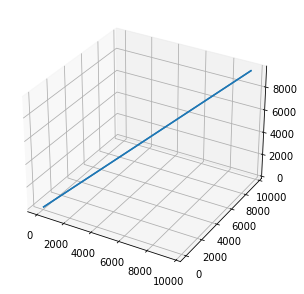

In [4]:
# 画二维函数
def fuc1(x):
    return x*x
# some test data.
x = np.arange(0,100,2)
y = np.arange(0,100,2)
X = fuc1(x)
Y = fuc1(y)
Z = np.array([X,Y])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
# Plot a basic wireframe.
ax.plot_wireframe(X, Y,Z, rstride=10, cstride=10)
plt.show()

In [9]:
# 二维梯度
def gradient(f,x):
    h = 1e-6
    grad = np.zeros_like(x)    # 生成一个全为0的np数组
    for idx in range(x.size): # 
        tmp_val = x[idx]       # 
        # f(x+h)
        x[idx] = tmp_val+h    #  
        fxh1 = f(x)            # 二维函数的梯度，固定未求偏导的值
        print(fxh1)
        # f(x-h)
        x[idx] = tmp_val-h
        fxh2 = f(x)           # 
        print(fxh2)
        grad[idx] = (fxh1-fxh2)/(2*h)
        print(grad)
        x[idx] = tmp_val  # 还原值
        
    return grad

def fuc2(x):   # 传入的是一个列表
    return x[0]**2+x[1]**2
x = np.array([3.0,4.0])
print(fuc2(x))
gradient(fuc2,np.array([3.0,4.0]))   # 求点（3.0，4.0）的梯度

25.0
25.000006000001
24.999994000001
[6. 0.]
25.000008000001
24.999992000001
[6. 8.]


array([6., 8.])

In [6]:
# 梯度下降
def gradient_descend(f,init_x,lr=0.01,step_num=100):
    x = init_x
    for i in range(step_num):
        grad = gradient(f,x)
        x -= lr*grad
    return x

init_x = np.array([-3.0,4.0])
gradient_descend(fuc2,init_x=init_x,lr=0.01,step_num=20)

array([-2.00282392,  2.67043189])

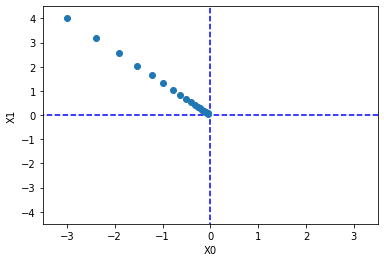

In [7]:
# 可视化
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []		

    for i in range(step_num):
        x_history.append(x.copy())  # 用一个列表保存每次更新前x的值 

        grad = gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(fuc2, init_x, lr=lr, step_num=step_num)
plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o') #, 'o'
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


In [ ]:
# 首先实现一个两层的神经网络
import numpy as np
class Twolayer:
    def __init__(self,input_size,hidden_size,uotput_size,weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std*np.random.randn(input_size,hidden_size)
        self.params['b1'] =  np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*np.random.randn(hidden_size,output_size)
        self.params['b1'] =  np.zeros(hidden_size)
        
    def predict(self,x):
        W1,W2 = self.params['W1'],self.params['W2']
        b1,b2 = self.params['b'],self.params['b']
        a1 = np.dot(x,W1)+b1
        z1 = sigmod(a1)
        a2 = np.dot(x,W2)+b2
        y = softmax(a2)
        
        return y
    # 输入数据x,监督数据：t
    def loss(self,x,t):
        y = predict(x)
        return cross_entropy_error(y,t)
    # 准确率
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)  # 返回某一维度的最大值
        t = np.argmax(t,axis=1)  # 监督，返回某一维度的最大值
        accuracy = np.sum(y==t)/float(x.shape[0])  # 预测对的/总的输入
        return accuracy
    
    def numerical_gradient(self,x,t):
        loss_W = lambda W:self.loss(x,t)   # loss_W表示一个函数self.loss(x,t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W,self.params['W'])    #  
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads